In [15]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_cherry_and_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [16]:
data

['t_n55          8.9495 ( 8.5661,  9.3989) ( 8.5395,  9.3687)  0.8292 (Jnode 106)\n',
 't_n56          8.8367 ( 8.4997,  9.2046) ( 8.4943,  9.1953)  0.7010 (Jnode 105)\n',
 't_n57          8.3637 ( 8.0832,  8.6707) ( 8.0830,  8.6703)  0.5873 (Jnode 104)\n',
 't_n58          7.2895 ( 7.1195,  7.4776) ( 7.1143,  7.4713)  0.3570 (Jnode 103)\n',
 't_n59          7.0770 ( 6.9204,  7.2562) ( 6.9169,  7.2493)  0.3323 (Jnode 102)\n',
 't_n60          6.8231 ( 6.6724,  6.9972) ( 6.6631,  6.9857)  0.3226 (Jnode 101)\n',
 't_n61          6.4564 ( 6.2997,  6.6290) ( 6.2960,  6.6230)  0.3271 (Jnode 100)\n',
 't_n62          3.1939 ( 2.7697,  3.5478) ( 2.7679,  3.5458)  0.7779 (Jnode 99)\n',
 't_n63          4.9862 ( 4.8090,  5.2073) ( 4.8109,  5.2088)  0.3980 (Jnode 98)\n',
 't_n64          3.9445 ( 3.7492,  4.1697) ( 3.7405,  4.1596)  0.4191 (Jnode 97)\n',
 't_n65          3.6022 ( 3.4167,  3.8067) ( 3.4123,  3.7988)  0.3865 (Jnode 96)\n',
 't_n66          3.0169 ( 2.8524,  3.1893) ( 2.8457,  3.18

In [17]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [18]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [19]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [20]:
posterior_mean_iqtree

[8.9495,
 8.8367,
 8.3637,
 7.2895,
 7.077,
 6.8231,
 6.4564,
 3.1939,
 4.9862,
 3.9445,
 3.6022,
 3.0169,
 2.2709,
 1.6664,
 0.6896,
 3.9249,
 6.9008,
 6.6315,
 6.4497,
 4.9177,
 4.4678,
 5.0601,
 6.8395,
 6.5809,
 6.3607,
 6.0607,
 5.6499,
 5.5074,
 4.9454,
 4.5736,
 4.256,
 3.3409,
 3.1066,
 5.0201,
 4.2249,
 6.736,
 1.6872,
 6.5771,
 6.2417,
 5.7259,
 5.4007,
 4.1445,
 4.7412,
 5.4614,
 5.2649,
 4.904,
 3.7924,
 4.827,
 7.6479,
 5.8173,
 3.774,
 2.9496,
 6.1981]

In [21]:
lower_ci_iqtree

[0.5661,
 0.4997,
 0.0832,
 0.1195,
 0.9204,
 0.6724,
 0.2997,
 0.7697,
 0.809,
 0.7492,
 0.4167,
 0.8524,
 0.1678,
 0.649,
 0.6222,
 0.6815,
 0.7559,
 0.4325,
 0.3377,
 0.6443,
 0.1557,
 0.0433,
 0.6947,
 0.4375,
 0.2166,
 0.9293,
 0.5417,
 0.3876,
 0.8096,
 0.4423,
 0.1251,
 0.2521,
 0.0554,
 0.9762,
 0.1614,
 0.5919,
 0.2628,
 0.4396,
 0.1153,
 0.6167,
 0.3149,
 0.9258,
 0.7024,
 0.2703,
 0.0495,
 0.6536,
 0.4633,
 0.4919,
 0.3752,
 0.4135,
 0.2854,
 0.3111,
 0.513]

In [22]:
upper_ci_iqtree

[9.3989,
 9.2046,
 8.6707,
 7.4776,
 7.2562,
 6.9972,
 6.629,
 3.5478,
 5.2073,
 4.1697,
 3.8067,
 3.1893,
 2.3884,
 1.7131,
 0.7761,
 4.197,
 7.0714,
 6.8341,
 6.5976,
 5.1233,
 4.7322,
 5.1038,
 7.0003,
 6.7355,
 6.5177,
 6.2057,
 5.7713,
 5.6341,
 5.067,
 4.7085,
 4.3984,
 3.4708,
 3.2338,
 5.1217,
 4.3466,
 6.8956,
 2.0353,
 6.729,
 6.3772,
 5.8385,
 5.4845,
 4.3435,
 4.8286,
 5.6254,
 5.4432,
 5.0786,
 4.0948,
 5.0656,
 7.9312,
 6.21,
 4.244,
 3.4783,
 6.8418]

In [23]:
file_LG = open("LG_cherry_and_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

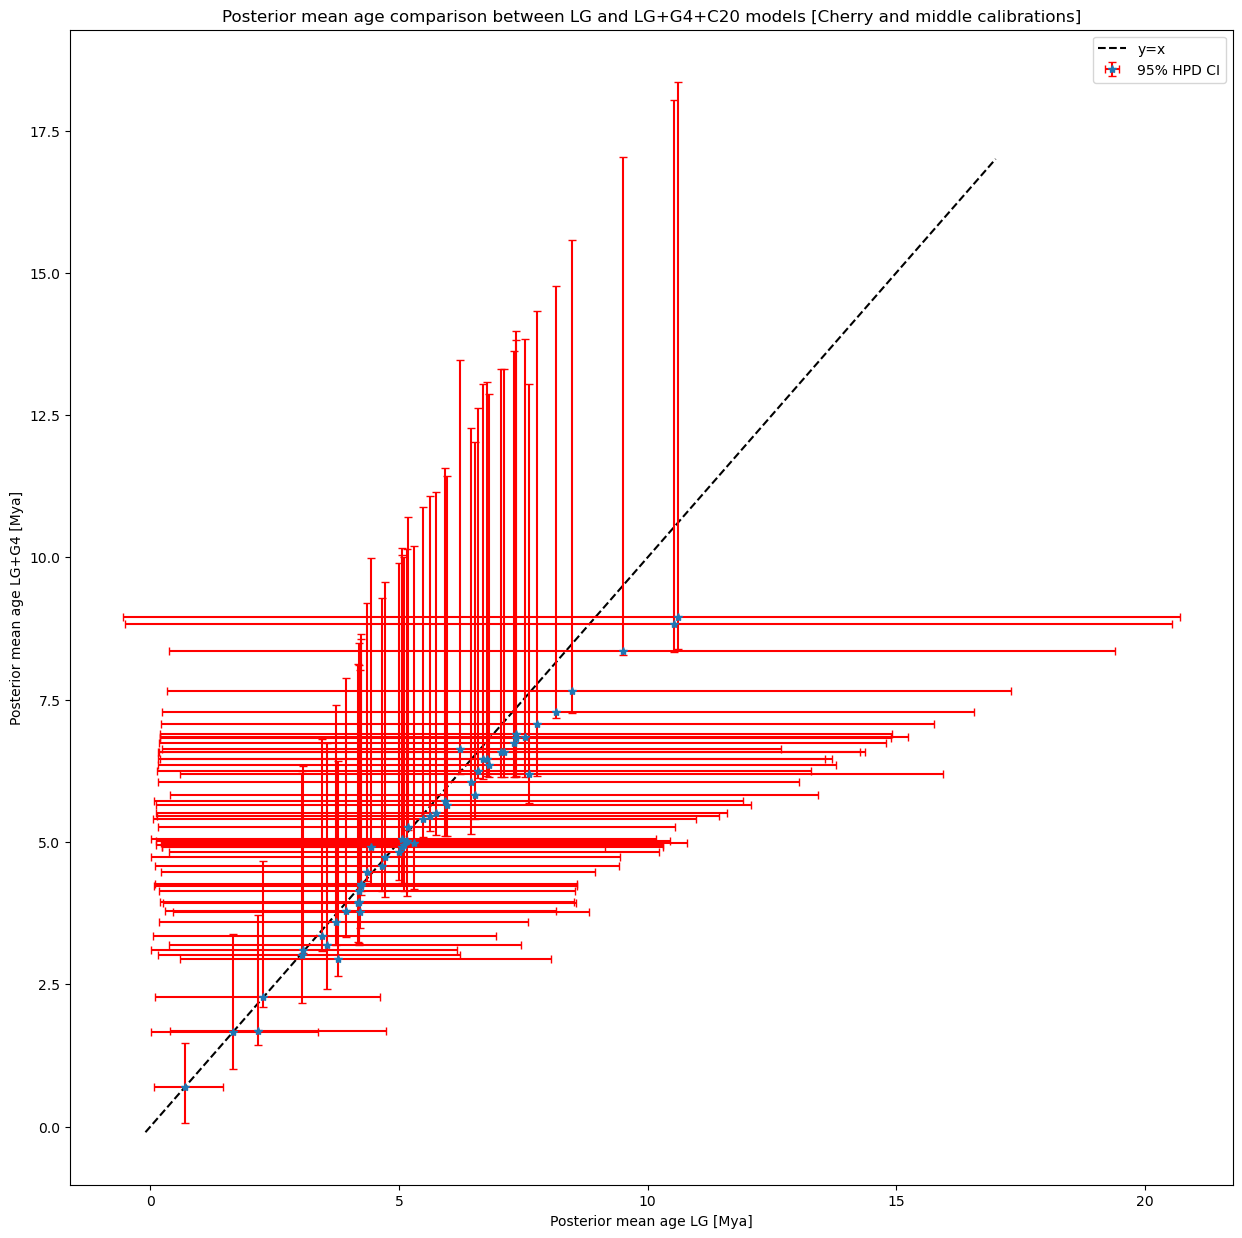

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Cherry and middle calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_cm.png')

In [25]:
posterior_mean_baseml

[10.6067,
 10.5272,
 9.5013,
 8.1666,
 7.7688,
 7.3481,
 6.7623,
 3.5443,
 5.3044,
 4.1926,
 3.7283,
 3.056,
 2.2692,
 1.6631,
 0.6911,
 4.1757,
 7.3558,
 6.2292,
 6.6961,
 5.0579,
 4.3521,
 5.0626,
 7.5286,
 7.1017,
 6.8146,
 6.4437,
 5.9749,
 5.737,
 5.1021,
 4.6573,
 4.2436,
 3.4462,
 3.0681,
 5.1674,
 4.2273,
 7.3118,
 2.1554,
 7.0599,
 6.5796,
 5.9188,
 5.4781,
 4.202,
 4.7124,
 5.6322,
 5.1711,
 4.4461,
 3.9268,
 4.9983,
 8.4819,
 6.5279,
 4.2099,
 3.7662,
 7.6112]

In [26]:
posterior_mean_iqtree

[8.9495,
 8.8367,
 8.3637,
 7.2895,
 7.077,
 6.8231,
 6.4564,
 3.1939,
 4.9862,
 3.9445,
 3.6022,
 3.0169,
 2.2709,
 1.6664,
 0.6896,
 3.9249,
 6.9008,
 6.6315,
 6.4497,
 4.9177,
 4.4678,
 5.0601,
 6.8395,
 6.5809,
 6.3607,
 6.0607,
 5.6499,
 5.5074,
 4.9454,
 4.5736,
 4.256,
 3.3409,
 3.1066,
 5.0201,
 4.2249,
 6.736,
 1.6872,
 6.5771,
 6.2417,
 5.7259,
 5.4007,
 4.1445,
 4.7412,
 5.4614,
 5.2649,
 4.904,
 3.7924,
 4.827,
 7.6479,
 5.8173,
 3.774,
 2.9496,
 6.1981]

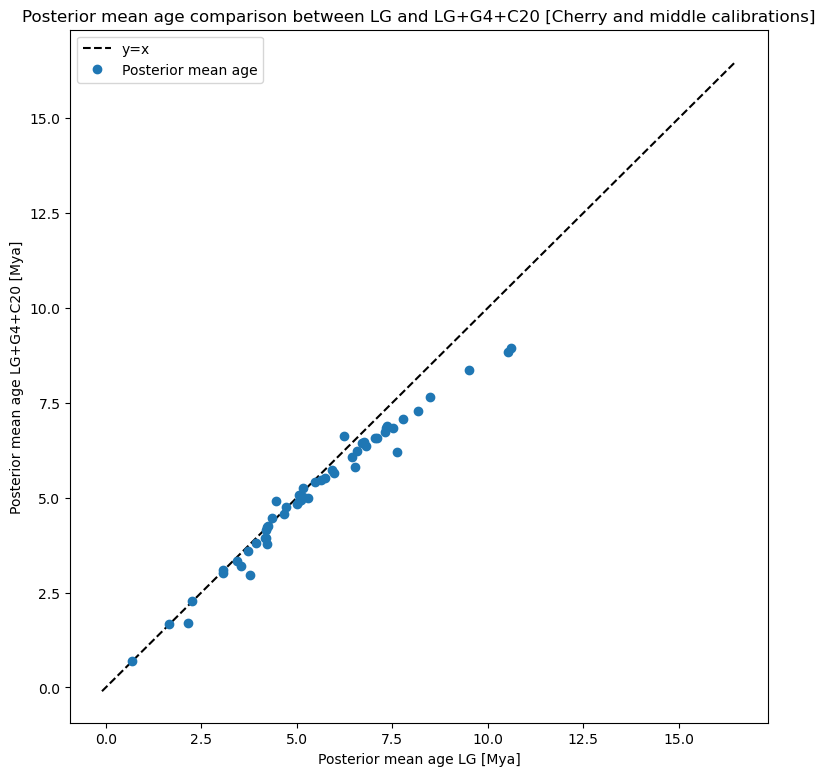

In [27]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,16.5], 
        [-0.1, 16.5], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 [Cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_cm_scatter.png')

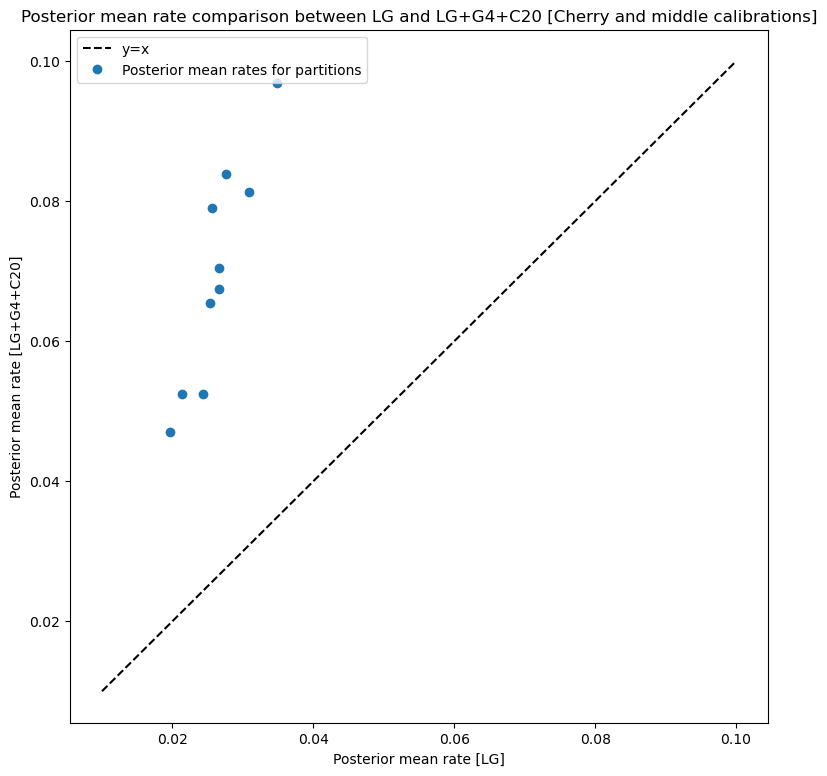

In [28]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.1], 
        [0.01, 0.1], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]')
ax.set_ylabel('Posterior mean rate [LG+G4+C20]')
ax.set_title('Posterior mean rate comparison between LG and LG+G4+C20 [Cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_rate_comparison_LG_G4_C20_cm_scatter.png')